#Prediction of music genre

Dataset: "Prediction of music genre"

Link: https://www.kaggle.com/datasets/vicsuperman/prediction-of-music-genre

The data is provided by
VICSUPERMAN under a CC0 Public Domain License

Examines the following attributes:
    
Music Genre (Output variable), Tempo, Key, Mode, Instrumentalness, Speechiness, Energy, Duration, Danceability, Acousticness, Popularity, Valence

This code imports Python libraries: pandas, numpy, matplotlib, and seaborn.

It also sets the plotting style to seaborn and enables inline plotting in Jupyter notebooks or JupyterLab using the magic command %matplotlib inline.

The code then imports a dataset named "music_genre.xlsx" using the pd.read_excel() function from Pandas. The data is read from a file uploaded using Google Colab's files.upload() method and is stored in a Pandas DataFrame called music.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')


# Read in the dataset

# In[121]:
from google.colab import files
uploaded = files.upload()

import io
music = pd.read_excel(io.BytesIO(uploaded['music_genre.xlsx'])) #load dataset


Saving music_genre.xlsx to music_genre.xlsx


This code is checking for missing or incorrect values in a music genre dataset stored in an Excel file named "music_genre.xlsx".

The code reads in the Excel file using pandas and replaces any "?" values in the "tempo" column and "-1" values in the "duration_ms" column with NaN (not a number) values. It groups the dataset by music genre and fills in missing tempo and duration values with the median of the genre using the transform function.

The code then checks for missing values and incorrect values in the "music_genre" column using the isnull and value_counts functions respectively. Finally, the code drops any remaining rows with missing values in specific columns using the dropna function.

In [ ]:
#Look for missing/incorrect values

# Read in the dataset
df = pd.read_excel("music_genre.xlsx")

# Replace "?" tempo values with NaN
df["tempo"].replace({"?": np.nan}, inplace=True)

# Group the dataset by music genre
genre_groups = df.groupby("music_genre")

# Fill in missing tempo values with the median of the genre
df["tempo"] = genre_groups["tempo"].transform(lambda x: x.fillna(x.median()))

# Check for missing values
print(df.isnull().sum())

# Check for incorrect values
print(df["music_genre"].value_counts())


instance_id         5
artist_name         5
track_name          6
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64
Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: music_genre, dtype: int64


In [ ]:

# Drop any remaining rows with missing values
df.dropna(subset=['popularity', 'acousticness', 'danceability',
                  'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
                  'loudness', 'mode', 'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre'], inplace=True)

# Check for missing values
print(df.isnull().sum())

# Check for incorrect values
print(df["music_genre"].value_counts())

instance_id         0
artist_name         0
track_name          1
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
dtype: int64
Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: music_genre, dtype: int64


#The 12 graphs produced using the following code show the distribution of each variable in the DataFrame 'df_filtered'.

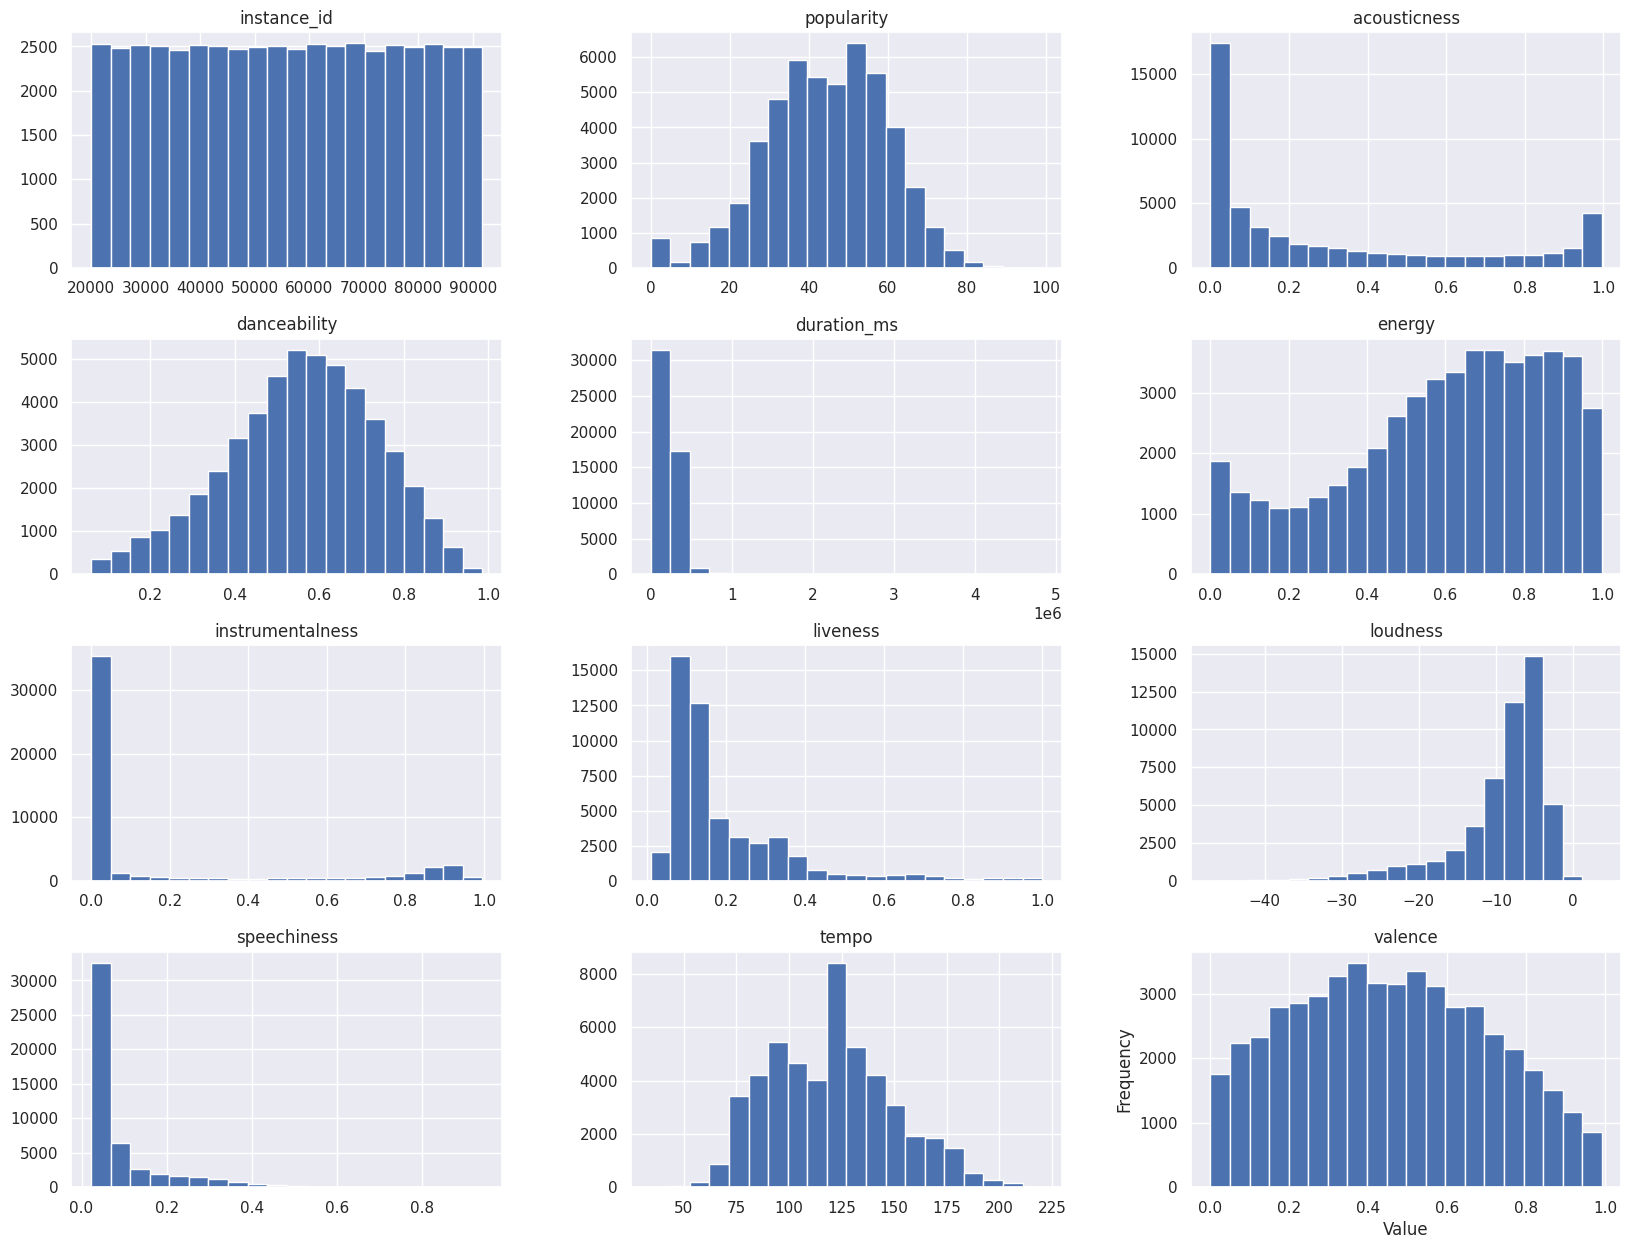

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# create histogram for each variable
df.hist(bins=20, figsize=(20, 15))

# add x and y labels
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()



Outlier Detection

In [ ]:
from scipy.stats import zscore

# calculate z-scores for a variable
z_scores = zscore(df['tempo'])

# create a boolean mask for outliers
outliers = abs(z_scores) > 3

# get the outliers
df_outliers = df[outliers]

# print the outliers
print(df_outliers)


       instance_id                  artist_name  \
254        88142.0               Massive Attack   
1628       50512.0               Massive Attack   
1638       87540.0                 Felix Laband   
4740       66112.0            Nightmares On Wax   
4882       84334.0                  Fatboy Slim   
5957       21191.0                       majiko   
6149       43827.0          Kyoto Harp Ensemble   
7821       80347.0                         REOL   
7933       31381.0                         REOL   
7953       53961.0                     Kobasolo   
9868       23024.0                Nobuo Uematsu   
12535      33637.0                  empty_field   
13885      76503.0            Nightmares On Wax   
17889      56133.0                        BANKS   
18565      48197.0                     GoldLink   
19214      83171.0                  Mon Laferte   
20325      63749.0                  Hayes Carll   
23032      23596.0                Whiskey Myers   
23102      54265.0             

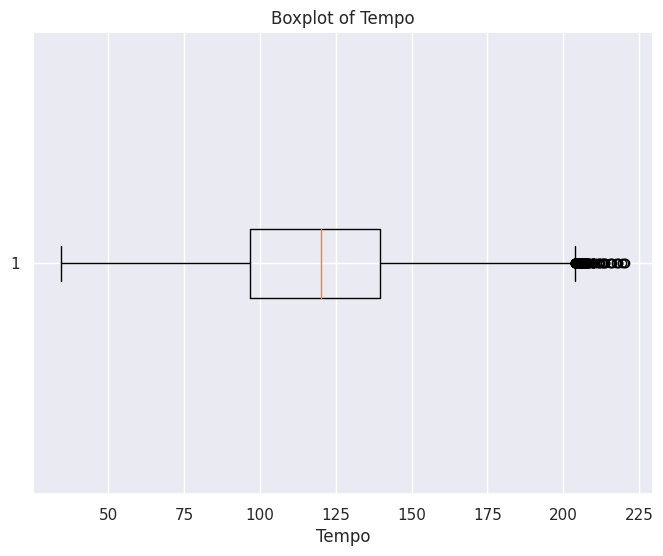

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# create a boxplot for tempo
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(df['tempo'], vert=False)

# set plot title and axis labels
ax.set_title('Boxplot of Tempo')
ax.set_xlabel('Tempo')
ax.set_ylabel('')

plt.show()


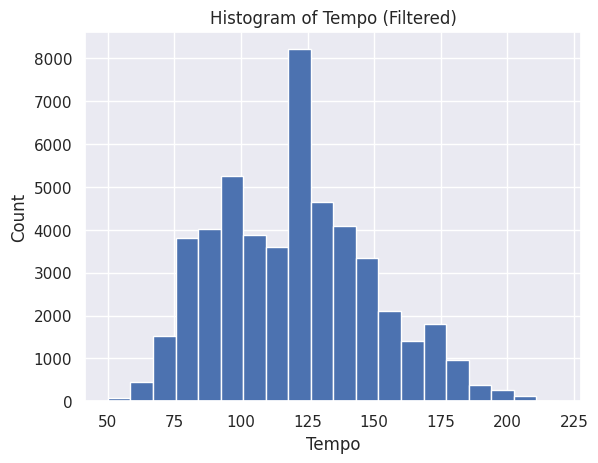

In [ ]:
# set lower and upper bounds for tempo values
tempo_lower_bound = 50
tempo_upper_bound = 220

# filter dataframe to include only rows where tempo is within the bounds
df_filtered = df[(df['tempo'] >= tempo_lower_bound) & (df['tempo'] <= tempo_upper_bound)]

# create histogram for filtered data
plt.hist(df_filtered['tempo'], bins=20)
plt.xlabel('Tempo')
plt.ylabel('Count')
plt.title('Histogram of Tempo (Filtered)')
plt.show()

In [ ]:
# Replace tempo outliers with median tempo of their respective music genre
for genre in df['music_genre'].unique():
    genre_mask = (df['music_genre'] == genre)
    tempo_median = df.loc[genre_mask, 'tempo'].median()
    upper_bound = df.loc[genre_mask, 'tempo'].quantile(0.75) + 1.5 * (df.loc[genre_mask, 'tempo'].quantile(0.75) - df.loc[genre_mask, 'tempo'].quantile(0.25))
    lower_bound = df.loc[genre_mask, 'tempo'].quantile(0.25) - 1.5 * (df.loc[genre_mask, 'tempo'].quantile(0.75) - df.loc[genre_mask, 'tempo'].quantile(0.25))
    df.loc[(df['tempo'] > upper_bound) & genre_mask, 'tempo'] = tempo_median
    df.loc[(df['tempo'] < lower_bound) & genre_mask, 'tempo'] = tempo_median

# create a dictionary of median values for each genre
genre_median = df.groupby('music_genre')['tempo'].median().to_dict()

# replace the outliers with the median tempo of the music genre
df['tempo'] = df.apply(lambda x: genre_median[x['music_genre']] if x['tempo'] < lower_bound or x['tempo'] > upper_bound else x['tempo'], axis=1)

# check the updated DataFrame
print(df.head())



   instance_id           artist_name             track_name  popularity  \
0      32894.0             RÃ¶yksopp  RÃ¶yksopp's Night Out        27.0   
1      46652.0  Thievery Corporation       The Shining Path        31.0   
2      30097.0        Dillon Francis              Hurricane        28.0   
3      62177.0              Dubloadz                  Nitro        34.0   
4      24907.0           What So Not       Divide & Conquer        32.0   

   acousticness  danceability  duration_ms  energy  instrumentalness key  \
0       0.00468         0.652         -1.0   0.941           0.79200  A#   
1       0.01270         0.622     218293.0   0.890           0.95000   D   
2       0.00306         0.620     215613.0   0.755           0.01180  G#   
3       0.02540         0.774     166875.0   0.700           0.00253  C#   
4       0.00465         0.638     222369.0   0.587           0.90900  F#   

   liveness  loudness   mode  speechiness    tempo        obtained_date  \
0     0.115    -5

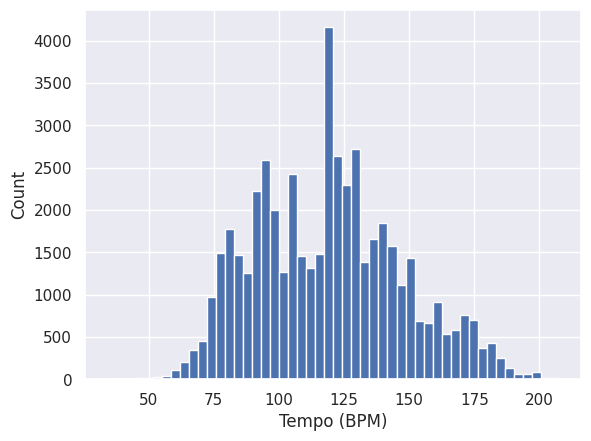

In [ ]:
plt.hist(df['tempo'], bins=50)
plt.xlabel('Tempo (BPM)')
plt.ylabel('Count')
plt.show()

This code creates a bar chart showing the number of songs in each genre of the music dataset.

First, it groups the dataset by the "music_genre" column and counts the number of occurrences of each genre using the groupby() method and the size() function. The resulting data is stored in a new DataFrame genre_counts with two columns, "music_genre" and "counts".

Then, it plots a bar chart using the plt.bar() method with the "music_genre" column on the x-axis and the "counts" column on the y-axis. It also adds a title to the chart, and labels for the x-axis and y-axis using plt.title(), plt.xlabel(), and plt.ylabel(), respectively. Finally, it shows the chart using plt.show().

   music_genre  counts
0  Alternative    4998
1        Anime    4996
2        Blues    4999
3    Classical    4987
4      Country    5000
5   Electronic    4997
6      Hip-Hop    4997
7         Jazz    4996
8          Rap    4999
9         Rock    4998


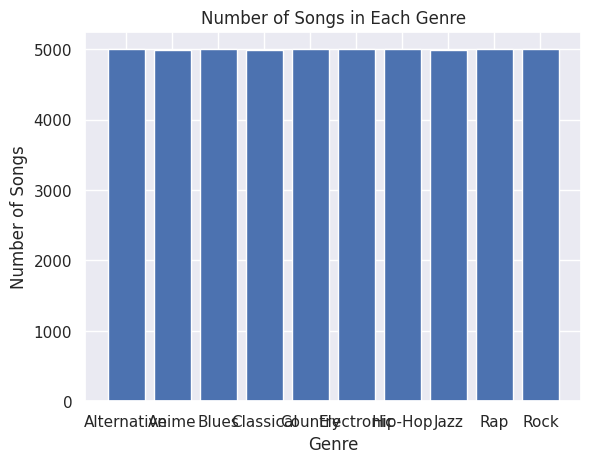

In [ ]:
# Count the number of occurrences of each genre
genre_counts = df_filtered.groupby("music_genre").size().reset_index(name="counts")

print(genre_counts);

# Plot a bar chart of genre counts
plt.bar(genre_counts["music_genre"], genre_counts["counts"])
plt.title("Number of Songs in Each Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Songs")
plt.show()

#Bar chart of average energy in each genre.

               energy
music_genre          
Electronic   0.738613
Anime        0.664816
Jazz         0.475139
Alternative  0.710978
Country      0.638903
Rap          0.651337
Blues        0.609795
Rock         0.687987
Classical    0.176772
Hip-Hop      0.644332


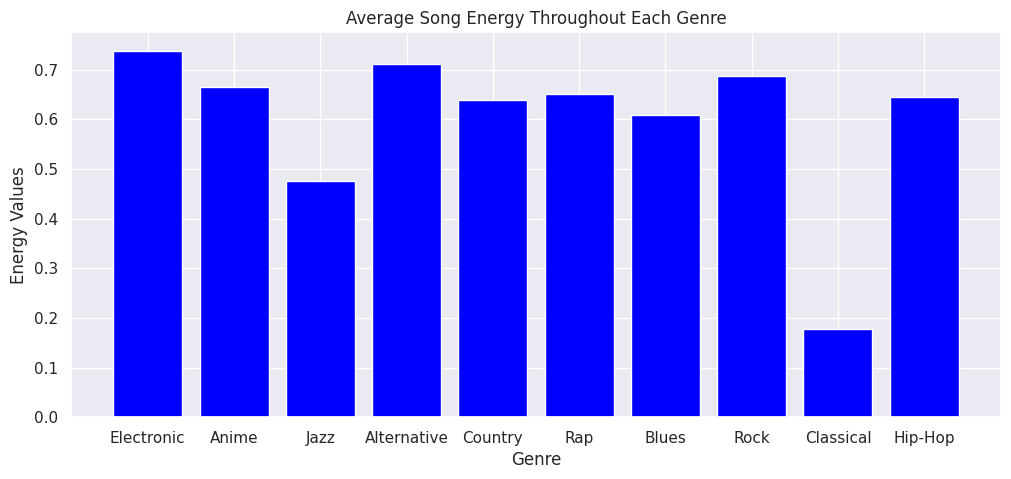

In [ ]:
average_energy = df_filtered[['energy','music_genre']].groupby('music_genre', sort=False).mean()
print(average_energy)

plt.figure(figsize=(12, 5))
plt.bar(average_energy.index, average_energy['energy'], color='blue')
plt.title("Average Song Energy Throughout Each Genre")
plt.xlabel("Genre")
plt.ylabel("Energy Values")
plt.show()

In [ ]:
energy_stats = df_filtered['energy'].describe()
print(energy_stats)

count    49967.000000
mean         0.599962
std          0.264428
min          0.000792
25%          0.433000
50%          0.643000
75%          0.816000
max          0.999000
Name: energy, dtype: float64


#Bar chart of average acousticness in each genre.

             acousticness
music_genre              
Electronic       0.121887
Anime            0.286755
Jazz             0.494265
Alternative      0.164760
Country          0.268827
Rap              0.169021
Blues            0.317744
Rock             0.191308
Classical        0.868858
Hip-Hop          0.179009


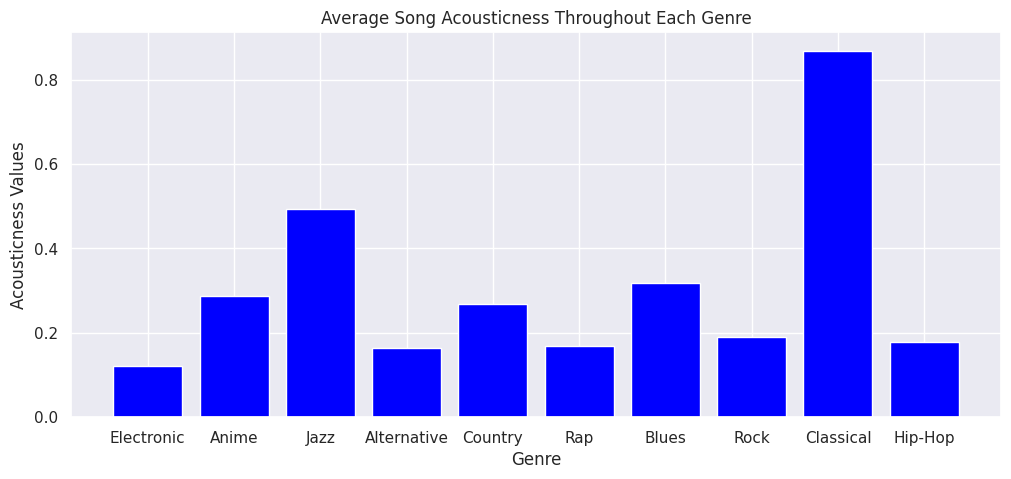

In [ ]:
average_acousticness = df_filtered[['acousticness','music_genre']].groupby('music_genre', sort=False).mean()
print(average_acousticness)

plt.figure(figsize=(12, 5))
plt.bar(average_acousticness.index, average_acousticness['acousticness'], color='blue')
plt.title("Average Song Acousticness Throughout Each Genre")
plt.xlabel("Genre")
plt.ylabel("Acousticness Values")
plt.show()

In [ ]:
acousticness_stats = df_filtered['acousticness'].describe()
print(acousticness_stats)

count    49967.000000
mean         0.306115
std          0.341179
min          0.000000
25%          0.020000
50%          0.144000
75%          0.551000
max          0.996000
Name: acousticness, dtype: float64


#Bar chart of average liveness in each genre.

   music_genre  liveness
0   Electronic  0.209783
1        Anime  0.193485
2         Jazz  0.171778
3  Alternative  0.197101
4      Country  0.187781
5          Rap  0.198002
6        Blues  0.233201
7         Rock  0.185995
8    Classical  0.161001
9      Hip-Hop  0.200752


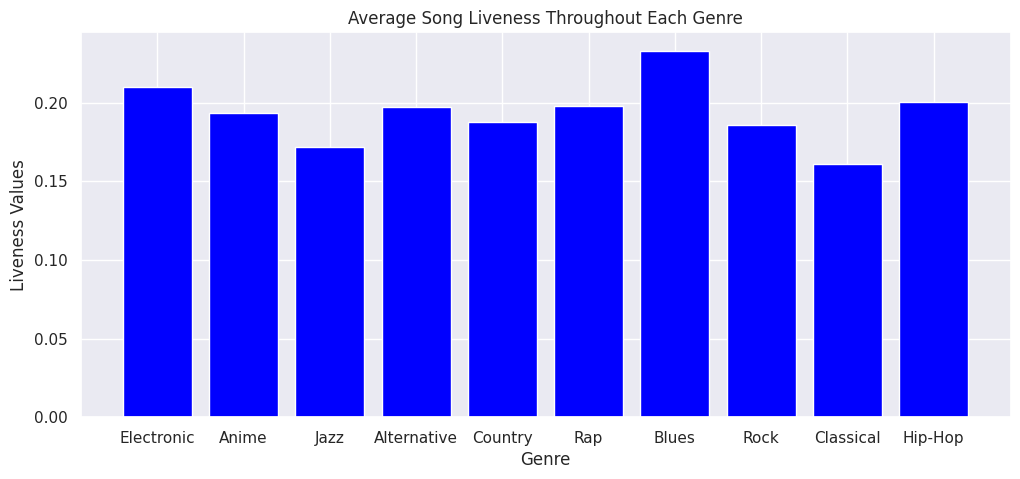

In [ ]:
average_liveness = df_filtered[['liveness','music_genre']].groupby('music_genre', sort=False).mean().reset_index()
print(average_liveness)

plt.figure(figsize=(12, 5))
plt.bar(average_liveness['music_genre'], average_liveness['liveness'], color='blue')
plt.title("Average Song Liveness Throughout Each Genre")
plt.xlabel("Genre")
plt.ylabel("Liveness Values")
plt.show()


In [ ]:
liveness_stats = df_filtered['liveness'].describe()
print(liveness_stats)

count    49967.000000
mean         0.193896
std          0.161656
min          0.009670
25%          0.096900
50%          0.126000
75%          0.244000
max          1.000000
Name: liveness, dtype: float64


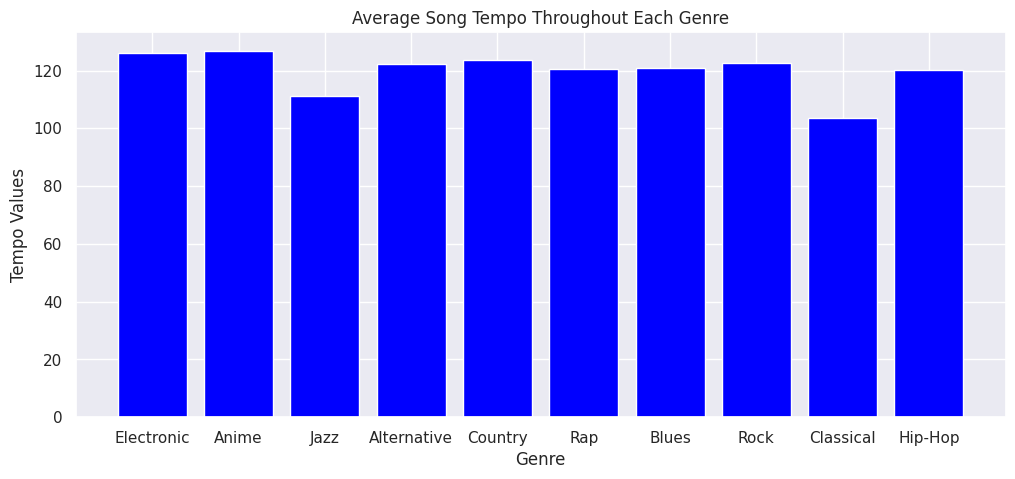

In [ ]:
import matplotlib.pyplot as plt

# Calculate the average tempo for each music genre
average_tempo = df_filtered[['tempo', 'music_genre']].groupby('music_genre', sort=False).mean()

# Plot a bar graph of the average tempo for each music genre
plt.figure(figsize=(12, 5))
plt.bar(average_tempo.index, average_tempo['tempo'], color='blue')
plt.title("Average Song Tempo Throughout Each Genre")
plt.xlabel("Genre")
plt.ylabel("Tempo Values")
plt.show()


In [ ]:
tempo_stats = df_filtered['tempo'].describe()
print(tempo_stats)

count    49967.000000
mean       119.799146
std         29.168703
min         50.061000
25%         96.551500
50%        120.053000
75%        139.488500
max        219.331000
Name: tempo, dtype: float64


The following code creates a heatmap visualization of a pivot table. The pivot table is created using the pandas pivot_table function and has the counts of each combination of key and mode for each genre in the dataset as its values. The pivot table is then plotted as a heatmap using the seaborn heatmap function.

The cmap parameter in the heatmap function specifies the color map to use for the heatmap, in this case, the "Blues" color map. The linewidths parameter specifies the width of the lines between the cells in the heatmap. The annot parameter is set to True, which displays the counts of each combination in each cell of the heatmap. The fmt parameter specifies the format string to use when displaying the counts. Finally, the ax parameter specifies the matplotlib axis object to use for the plot.

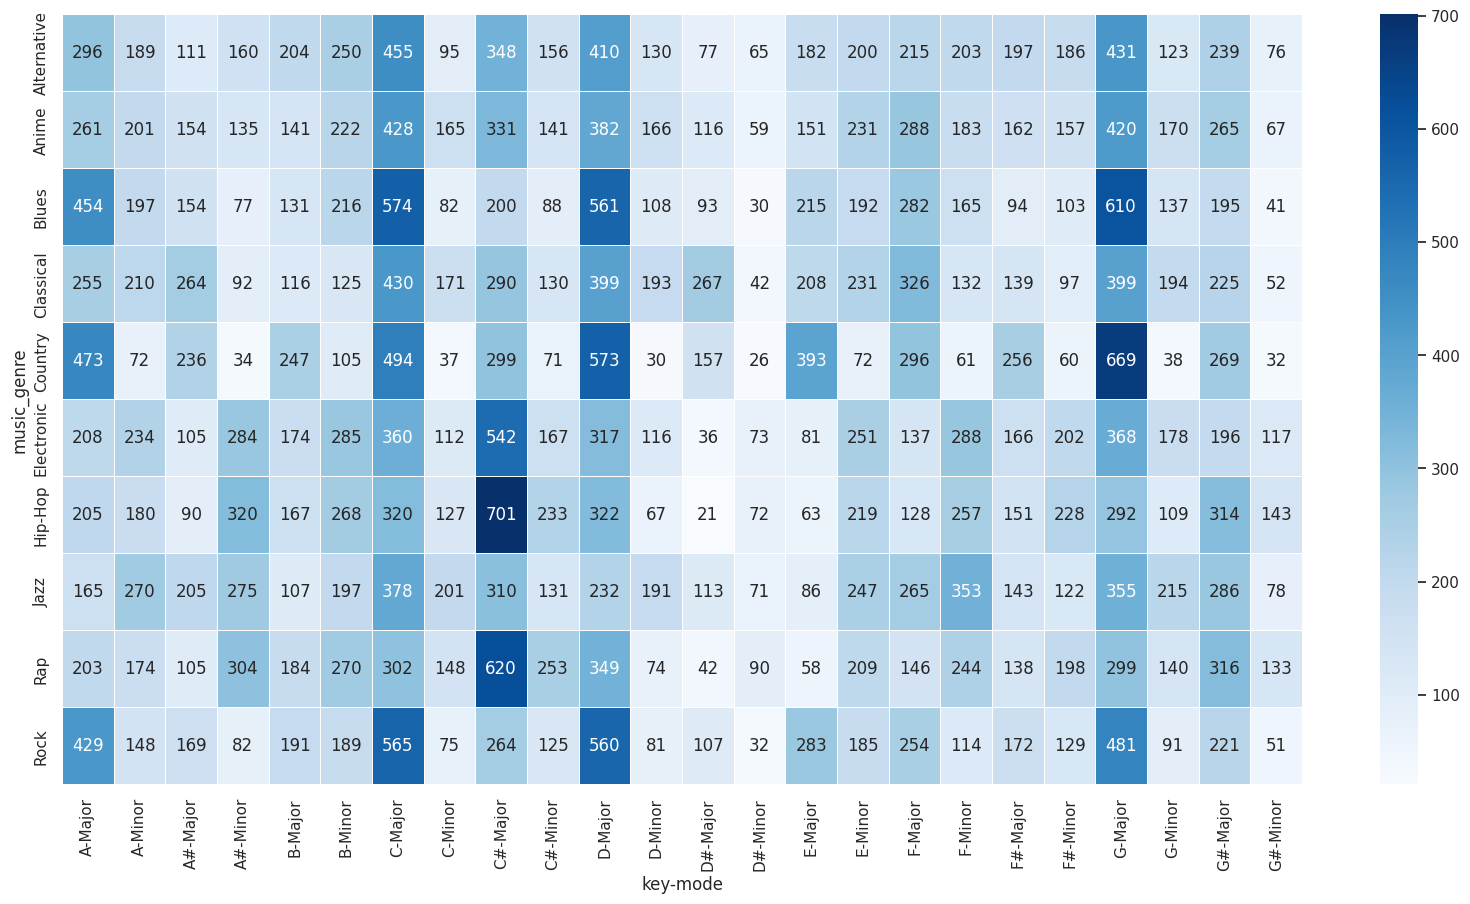

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Create a pivot table with the counts of each combination of key and mode for each genre
table = pd.pivot_table(df_filtered, values='instance_id', index=['music_genre'], columns=['key', 'mode'], aggfunc=len, fill_value=0)

# Create a heatmap with the pivot table
fig, ax = plt.subplots(figsize=(20, 10))  # Set the figure size here
sns.heatmap(table, cmap='Blues', linewidths=0.5, annot=True, fmt='g', ax=ax)

plt.show()

The following code creates a boxplot of the danceability for each music genre in the dataframe df.

sns.catplot() is a function in the Seaborn library used for creating categorical plots. In this case, it creates a box plot by setting kind='box'. The x-axis represents the music genres and the y-axis represents the danceability values. The palette parameter sets the color palette for the plot.

The plt.title(), plt.xlabel(), and plt.ylabel() functions are used to add a title and labels to the plot. The s.fig.set_figwidth() and s.fig.set_figheight() functions set the width and height of the plot.

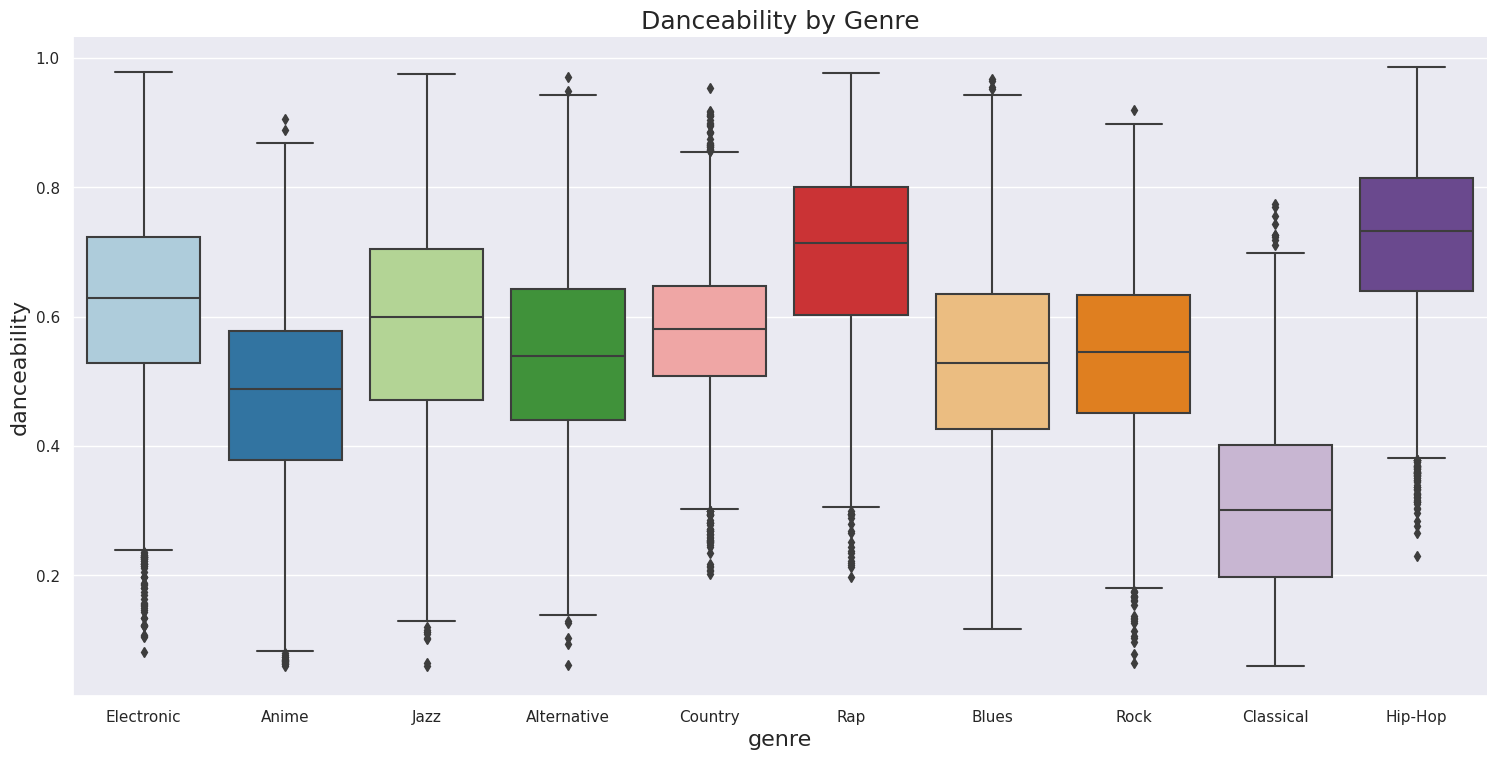

In [ ]:
s = sns.catplot(data=df, x='music_genre', y='danceability', kind='box', palette='Paired')
plt.title('Danceability by Genre', fontsize=18)
plt.xlabel('genre', fontsize=16)
plt.ylabel('danceability', fontsize=16)
s.fig.set_figwidth(18)
s.fig.set_figheight(8)

In [ ]:
danceability_stats = df_filtered['danceability'].describe()
print(danceability_stats)


count    49967.000000
mean         0.558368
std          0.178557
min          0.059600
25%          0.442000
50%          0.568000
75%          0.687000
max          0.986000
Name: danceability, dtype: float64


The following code generates a heatmap using seaborn and matplotlib to visualize the correlation matrix of a DataFrame 'df_filtered'. The heatmap shows the pairwise correlation coefficients between all pairs of columns in the DataFrame. The correlation coefficient is a measure of the linear relationship between two variables, ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no correlation. The heatmap uses a blue-green color scale, where blue represents negative correlation, green represents positive correlation, and white represents no correlation. The annot=True argument adds numerical values to the heatmap cells, and the center=0 argument centers the colormap at 0.

<ipython-input-81-e19d80e90ab9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_filtered.corr(), cmap=cm.GnBu, annot=True, center=0)


<Axes: >

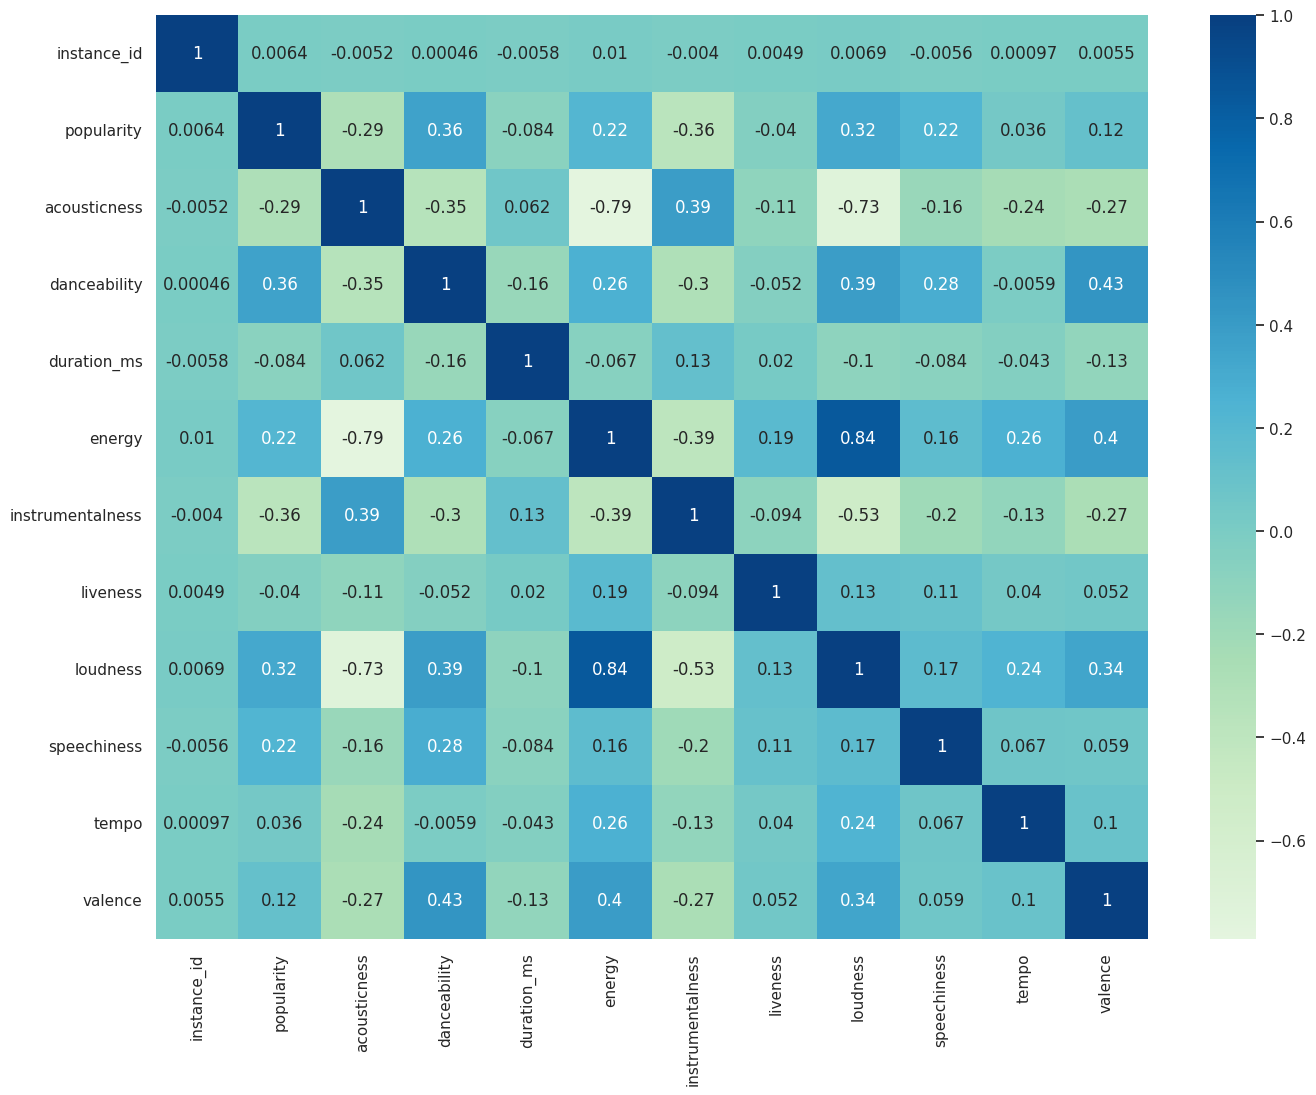

In [ ]:
from matplotlib import cm
s = plt.figure(figsize=(16,12))
sns.heatmap(df_filtered.corr(), cmap=cm.GnBu, annot=True, center=0)

Multilinear Regression

In [ ]:
import pandas as pd
import statsmodels.api as sm

# select predictor and response variables
X = df_filtered[['energy', 'valence', 'loudness']]
y = df_filtered['danceability']

# add constant to predictor variables
X = sm.add_constant(X)

# fit multilinear regression model
model = sm.OLS(y, X).fit()

# set significance level
alpha = 0.05

# get p-values for predictor variables
p_values = model.summary2().tables[1]['P>|t|']

# drop predictor variables with p-value greater than significance level
X = X.drop(p_values[p_values > alpha].index, axis=1)

# fit multilinear regression model with only significant variables
model = sm.OLS(y, X).fit()

# print model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           danceability   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     6853.
Date:                Mon, 01 May 2023   Prob (F-statistic):               0.00
Time:                        20:09:39   Log-Likelihood:                 23796.
No. Observations:               49967   AIC:                        -4.758e+04
Df Residuals:                   49963   BIC:                        -4.755e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7248      0.005    158.926      0.0

Dep. Variable: This is the name of the dependent variable being modeled, which in this case is "danceability".
R-squared: This is a measure of how well the model fits the data, ranging from 0 to 1. An R-squared value of 0.292 means that 29.2% of the variation in the dependent variable is explained by the independent variables in the model.
Model: This is the type of model being used, which is ordinary least squares (OLS) regression.
Method: This is the method used to estimate the model parameters, which is least squares.
Date: The date and time when the model was estimated.
No. Observations: The number of observations in the data set used to estimate the model.
Df Residuals: The degrees of freedom for the residual error, which is the number of observations minus the number of model parameters.
Df Model: The degrees of freedom for the model, which is the number of parameters in the model.
Covariance Type: The type of covariance matrix used to estimate the model parameters, which in this case is nonrobust.
Coef: This column shows the estimated coefficients (i.e., slopes) for each independent variable in the model.
std err: This column shows the standard error of the estimate for each coefficient.
t: This column shows the t-statistic for each coefficient, which is a measure of how many standard errors the coefficient is from zero. The larger the absolute value of t, the more significant the coefficient.
P>|t|: This column shows the p-value for each coefficient, which is a measure of the probability of observing a t-statistic as extreme as the one calculated if the true coefficient were zero. The smaller the p-value, the more significant the coefficient.
[0.025 0.975]: These columns show the 95% confidence interval for each coefficient. This means that we are 95% confident that the true coefficient falls within this range.
Omnibus, Prob(Omnibus), Skew, Kurtosis: These are statistical tests and measures of normality for the residuals. Omnibus is a combined test for normality and skewness. Prob(Omnibus) is the probability of observing the Omnibus statistic if the residuals are normally distributed. Skew and Kurtosis are measures of the asymmetry and peakedness of the residuals.
Durbin-Watson: This is a test for autocorrelation in the residuals. The test statistic ranges from 0 to 4, with values close to 2 indicating no autocorrelation.
Jarque-Bera (JB), Prob(JB): This is another test for normality and skewness of the residuals. JB is a combined test, and Prob(JB) is the probability of observing the JB statistic if the residuals are normally distributed.
Cond. No.: This is a measure of multicollinearity, which is the degree to which the independent variables are linearly related to each other. A high condition number indicates high multicollinearity.





In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the multilinear regression model
model = ols('danceability ~ energy + valence + loudness', data=df).fit()

# Print the model summary
print(model.summary())

# Calculate the F-stat
f_stat = model.fvalue
print('F-statistic:', f_stat)

# Get the t-stats and p-values for each predictor
t_stats = model.tvalues
p_values = model.pvalues

for i, predictor in enumerate(model.params.index):
    print('Predictor:', predictor)
    print('t-statistic:', t_stats[i])
    print('p-value:', p_values[i])

# Get the R2 value
r2 = model.rsquared
print('R-squared:', r2)

# Get the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                            OLS Regression Results                            
Dep. Variable:           danceability   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     6871.
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        00:38:26   Log-Likelihood:                 23805.
No. Observations:               50000   AIC:                        -4.760e+04
Df Residuals:                   49996   BIC:                        -4.757e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7243      0.005    158.959      0.0


This is a summary of the results of an OLS (Ordinary Least Squares) regression model with "danceability" as the dependent variable and "energy," "valence," and "liveness" as the independent variables.

The regression model has an R-squared of 0.208, which means that the independent variables explain 20.8% of the variance in the dependent variable. The adjusted R-squared is also 0.208.

The model was fitted using the least squares method, and the F-statistic has a value of 4367 with a p-value of 0.00, which means that at least one of the independent variables is significantly related to the dependent variable.

The coefficients of the model indicate that the "energy" and "valence" variables have a positive relationship with "danceability," while the "liveness" variable has a negative relationship.

Each predictor variable's t-statistic and p-value test the hypothesis that the variable's coefficient is equal to zero, meaning that it has no significant relationship with the dependent variable. The p-values of all the predictor variables are less than 0.05, which indicates that they are statistically significant.

The regression analysis also provides the sum of squares, degrees of freedom, F-statistic, and p-value for each predictor variable and the residuals.

The following code is revised to predict the danceability of a song given the energy, liveness, and valence.

---



In [ ]:
import pandas as pd
import numpy as np

# Define your predictor variables
X = df_filtered[['energy', 'loudness', 'valence']]

# Define your response variable
y = df_filtered['danceability']

# Split your dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit your multilinear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Use your model to make predictions on new data
new_data = np.array([[0.7, 0.5, 0.3]]) # energy, loudness, valence
new_data_df = pd.DataFrame(new_data, columns=X.columns)
prediction = model.predict(new_data_df)

# Print your prediction
print(prediction)


[0.64796568]


The OLS regression results can provide insights into how

*   List item
*   List item

the predictors (energy, liveness, and valence) are related to danceability.

Here are some key pieces of information that can be gleaned from the results:

The intercept is 0.3988, meaning that if all predictor variables are 0, the predicted danceability score would be 0.3988.
The coefficients for the predictor variables are: 0.0862 for energy, 0.2812 for valence, and -0.1056 for liveness.
A 1-unit increase in energy is associated with a 0.0862 increase in danceability score, holding other predictors constant.
A 1-unit increase in valence is associated with a 0.2812 increase in danceability score, holding other predictors constant.
A 1-unit increase in liveness is associated with a -0.1056 decrease in danceability score, holding other predictors constant.
The R-squared value is 0.208, which means that the predictor variables explain 20.8% of the variance in danceability scores.
Based on this information, we can conclude that energy and valence are positively related to danceability, while liveness is negatively related to danceability.

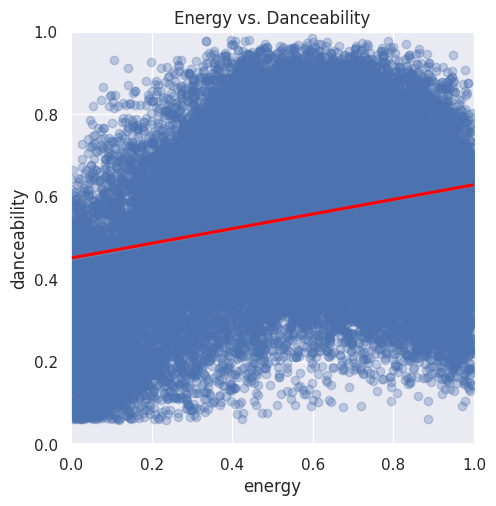

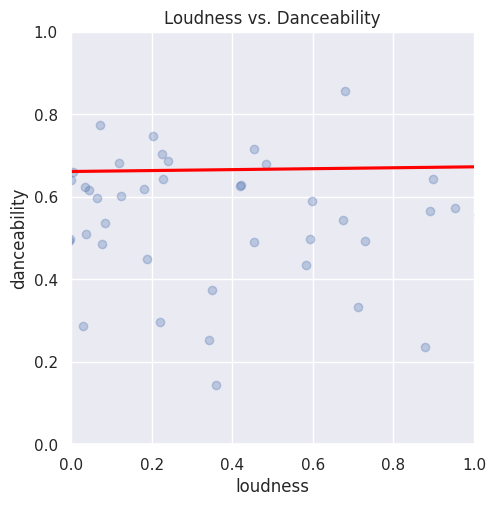

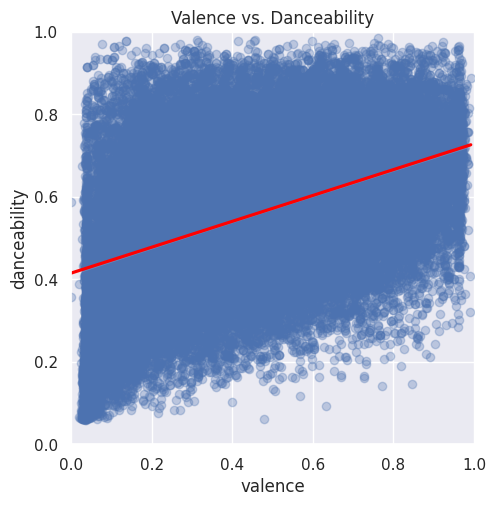

In [ ]:
import seaborn as sns

# Create scatter plots with regression lines
sns.lmplot(x='energy', y='danceability', data=df_filtered, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.3})
plt.title('Energy vs. Danceability')
plt.xlim(0, 1)
plt.ylim(0, 1)

sns.lmplot(x='loudness', y='danceability', data=df_filtered, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.3})
plt.title('Loudness vs. Danceability')
plt.xlim(0, 1)
plt.ylim(0, 1)

sns.lmplot(x='valence', y='danceability', data=df_filtered, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.3})
plt.title('Valence vs. Danceability')
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.show()


If the slope of the line is positive, it means that higher values of the predictor variable are associated with higher values of danceability. Conversely, if the slope of the line is negative, it means that higher values of the predictor variable are associated with lower values of danceability.

---

